<a href="https://colab.research.google.com/github/sudotouchwoman/math-misc/blob/main/notebooks/least-squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I was inspired by [this post](https://math.stackexchange.com/questions/63238/why-do-we-use-a-least-squares-fit) and checked whether the least squares method can predict the original denoised function. Actually, this is not completely true as the functions do not really coinside, this strongly depends on the scale of the noise!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

sns.set()

In [ ]:
def make_polynomial_regression(x: np.ndarray, y: np.ndarray, n: int = 1):
  X = np.vstack([x**i for i in range(n+1)])
  a_opt = np.linalg.inv(X @ X.T) @ X @ y
  y_opt = lambda x: sum(x**i * a_opt_i for i, a_opt_i in enumerate(a_opt))
  return a_opt, y_opt

In [ ]:
a, b = -1, 1
n_points = 21
scale = 1e-1

fx = lambda x: x**3 + x**2 + x
noised = lambda x: x + np.random.normal(size=x.shape, scale=scale)

x = np.linspace(a, b, n_points)
y = noised(fx(x))

_, y_opt = make_polynomial_regression(x, y, n=3)

xr = np.linspace(a, b, n_points * 100)

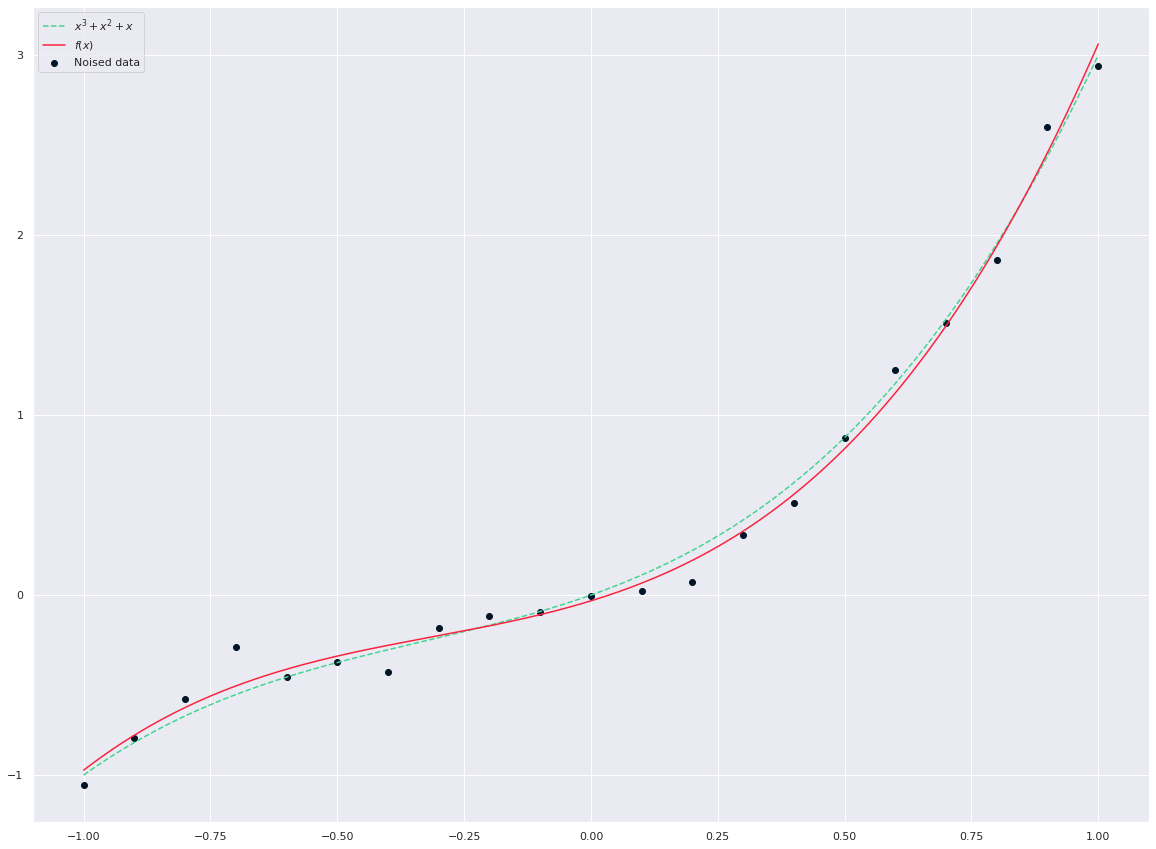

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

ax.plot(xr, fx(xr), label=r'$x^3+x^2+x$', ls='--', color='#44D492')
ax.plot(xr, y_opt(xr), ls='-', label=r'$f(x)$', color='#FA233E')
ax.scatter(x, y, label='Noised data', c='#011526')

ax.legend(loc='best')
plt.show()